# Experimenting with Time Series in R

I am essentially following a script I found [here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/). The examples use a dataset in R called *AirlinePassengers*. It is of the *TS* class. I am used to using data.frames.

In [1]:
df = data(AirPassengers)

Summary of this data. It doesn't seem to be a data.frame.

I am using *sprintf* in a similar fashion to print from python.

In [4]:
sprintf('AirPassengers is type %s.\nIt starts at %s and ends at %s.', class(AirPassengers), start(AirPassengers), end(AirPassengers))
#sprintf('AirPassagers has a frequency of %s.\nSummary: %s', frequency(AirPassengers), summary(AirPassengers))
print(summary(AirPassengers))
print(frequency(AirPassengers))

[1] "AirPassengers is type ts.\nIt starts at 1949 and ends at 1960."
[2] "AirPassengers is type ts.\nIt starts at 1 and ends at 12."

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 
[1] 12


## 1) Visualize TS Object & Use Traits to inform modeling.

#### Observations
1. Trend - there's a trend that grows per year (see fitted line below)
2. Seasonal - seems like there's  a seasonal component. Repeats roughly each year
3. Variance (t) - variance increases with time.

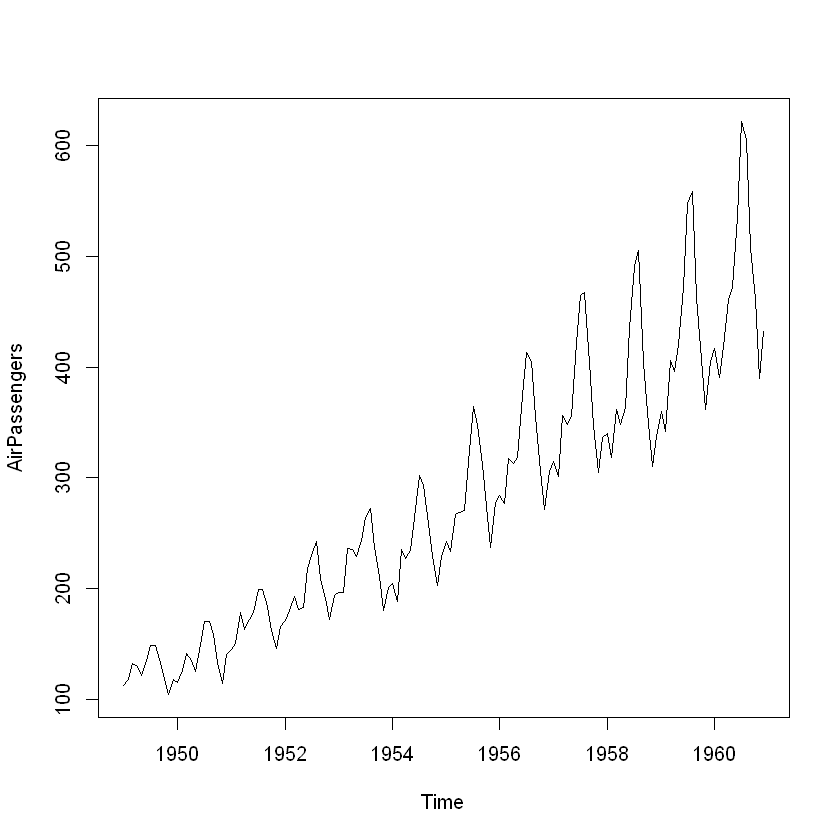

In [5]:
plot(AirPassengers)

### Now we add trend line using linear regression

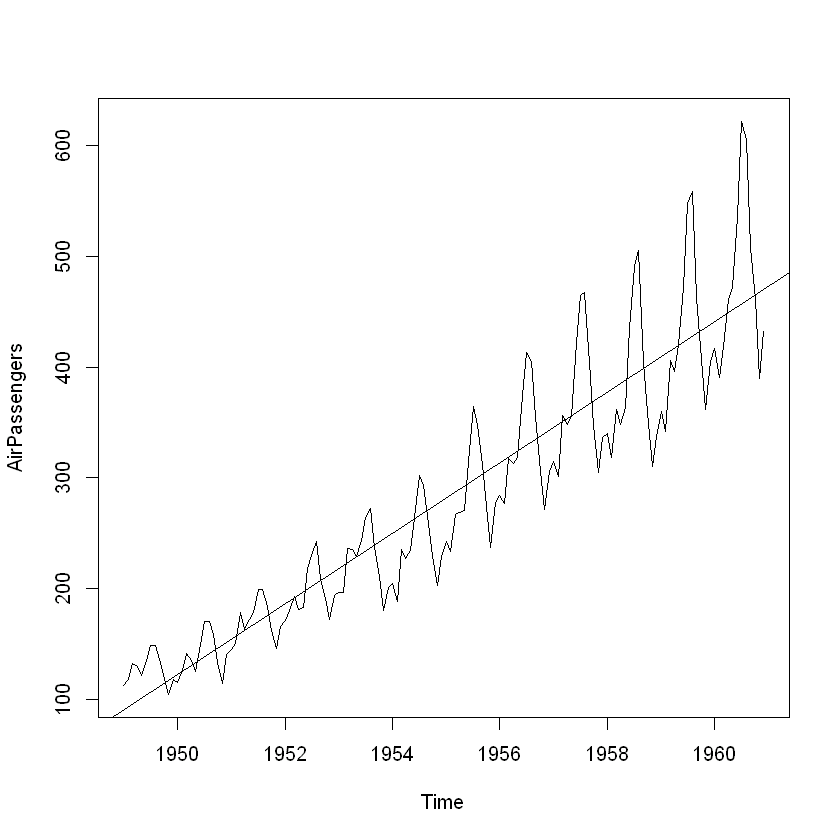

In [3]:
plot(AirPassengers)
abline(reg=lm(AirPassengers~time(AirPassengers)))

### We'll do a plot of the mean

The mean is pretty constant per year. Seems the aggregate function also handles TS intuitively

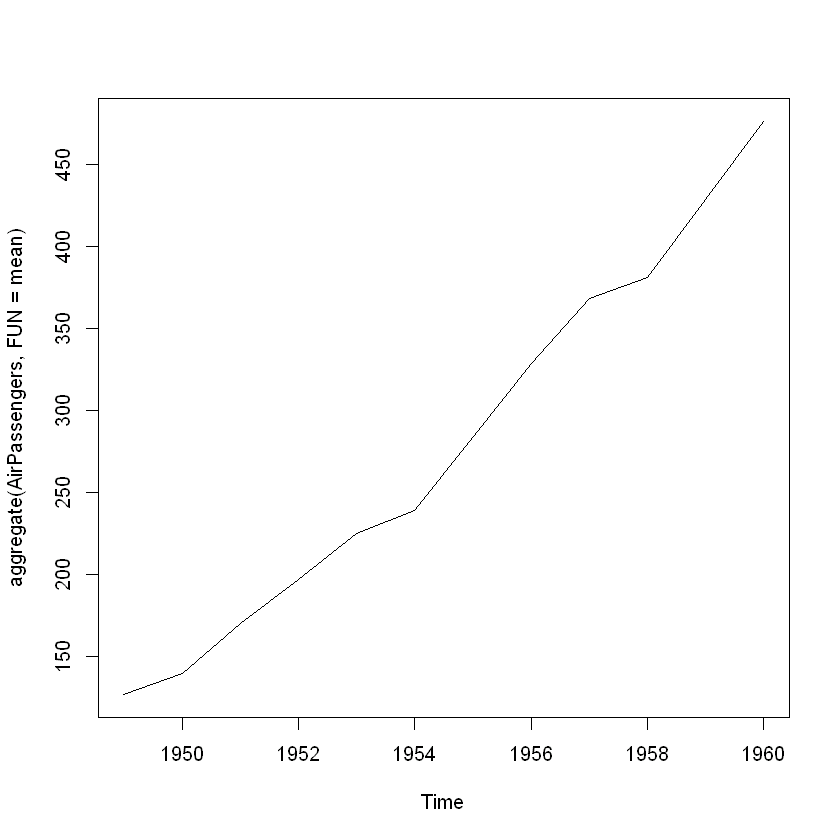

In [8]:
plot(aggregate(AirPassengers, FUN=mean))

### Lets see a box plot across the cycle

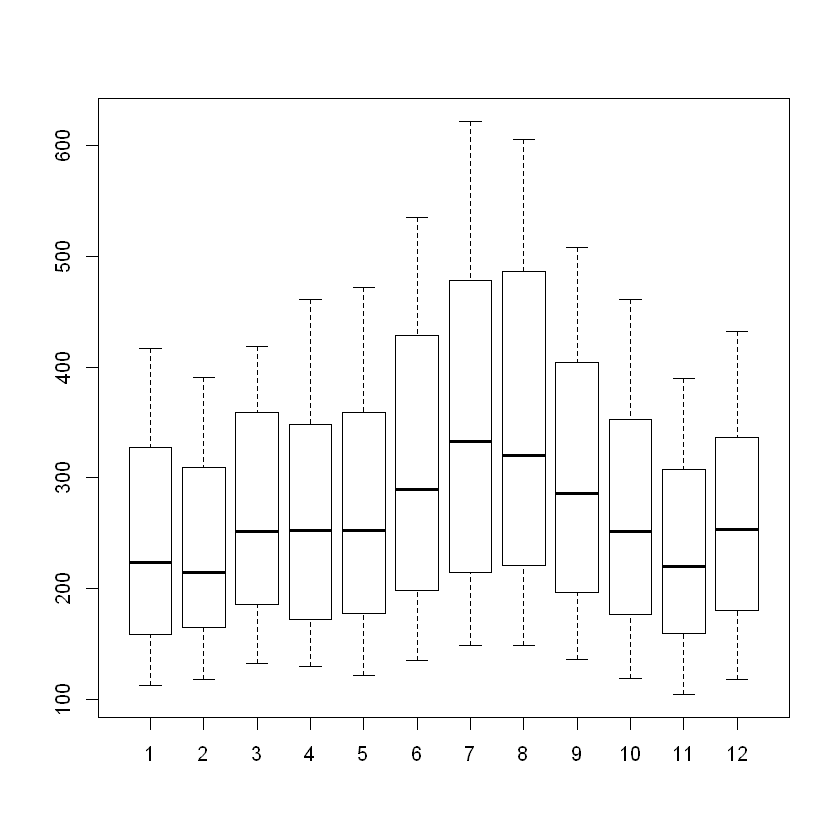

In [9]:
boxplot(AirPassengers~cycle(AirPassengers))

## 2) Do transform & Test for Stationarity
We use augmented Dickey-Fuller test using the*ADF* object in the *tseries* package to see if the following transform is stationary:
1. Log - To reduce the variance changes
2. Difference - To get read of the trend

In [3]:
#Install and reference libraries
#install.packages("tseries")
library("tseries")

Warning message:
: package 'tseries' was built under R version 3.2.5

#### Do ADF test

In [4]:
adf.test(diff(log(AirPassengers)), alternative = "stationary", k=0)

Warning message:
In adf.test(diff(log(AirPassengers)), alternative = "stationary", : p-value smaller than printed p-value


	Augmented Dickey-Fuller Test

data:  diff(log(AirPassengers))
Dickey-Fuller = -9.6003, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


# 3) Modeling
We conduct *__ARIMA__* modeling that only works on __stationary__ time series and needs paramters to handle non-stationary.

The components of the model are:
AR - Auto-regresson.
I - integratoin
MA - Moving average (effects that decay quickly)

The above results imply that log and differencing are enough. We have techniques that we use to determine parameters of the model:
1. Detrending (differencing helps)
2. Differencing (used to handle stationarity)
3. Seasonality (handled by parameters in teh ARIMA model)


#### Parameters
The parameters correspond to the techniques in the name of the ARIMA model.
* p (Auto regressoin [AR]) - over how many consecutive 
* d (differencing) - whehter you do it or not
* q (mean average [MA]) - handling spikes that affect time series over short period

### AR parameters
We'll use the ACF & PACF plots to determine this parameter.

### ACF on just log
As you can see below the decay is too slow for just log so it is not stationary. Same conclusion from the *ADF* test. So we will go with differencing.

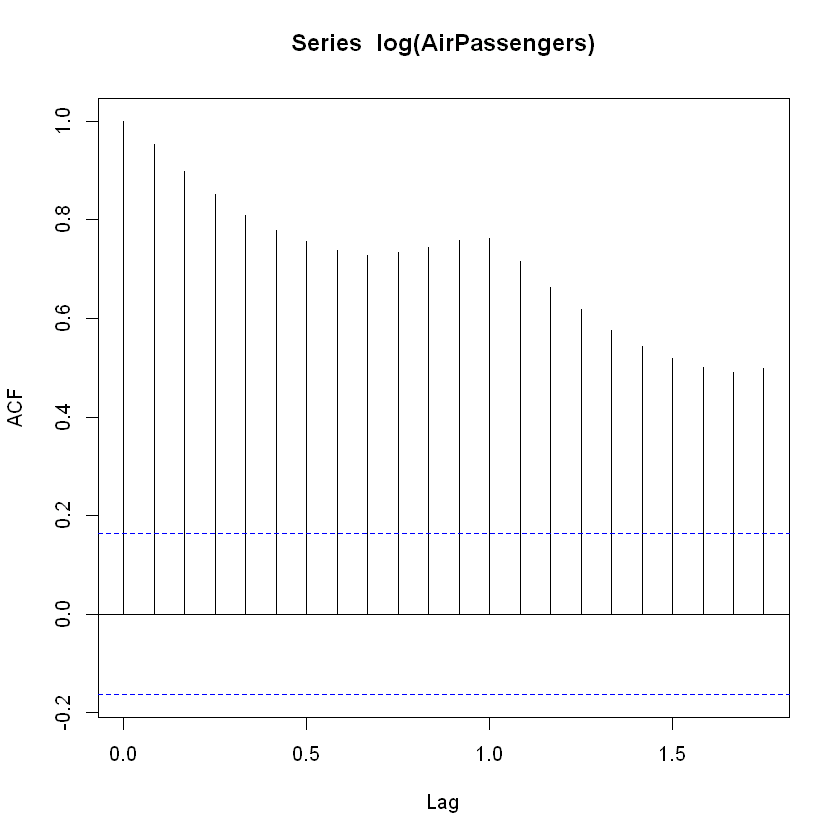

In [5]:
acf(log(AirPassengers))

### ACF & PACF of difference of log

Seems that the drop off comes after __X__=1. For some reason this maps to a __p__ of 0 and a __q__ of 1. I don't get it. I do understand how __d__ ends up being 1 because we should do differencing.

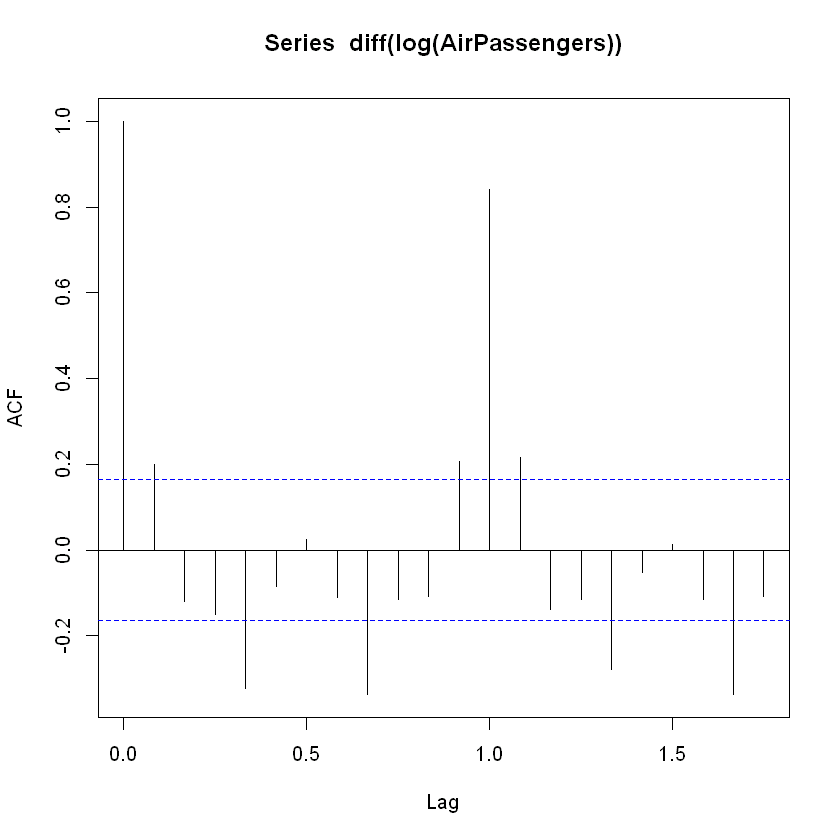

In [6]:
acf(diff(log(AirPassengers)))

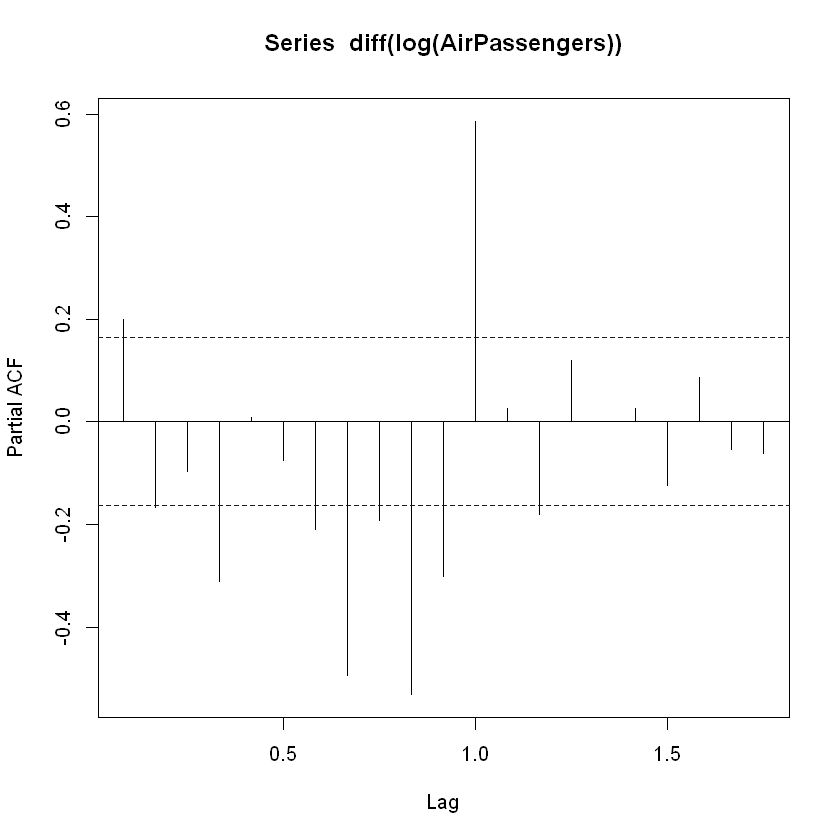

In [7]:
pacf(diff(log(AirPassengers)))

### Train model with p,d,q parameters from ACF, PACF visualization

In [8]:
(fit <- arima(log(AirPassengers), c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12)))


Call:
arima(x = log(AirPassengers), order = c(0, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -483.4

### Predict base one model

In [12]:
pred = predict(fit, n.ahead = 10*12)

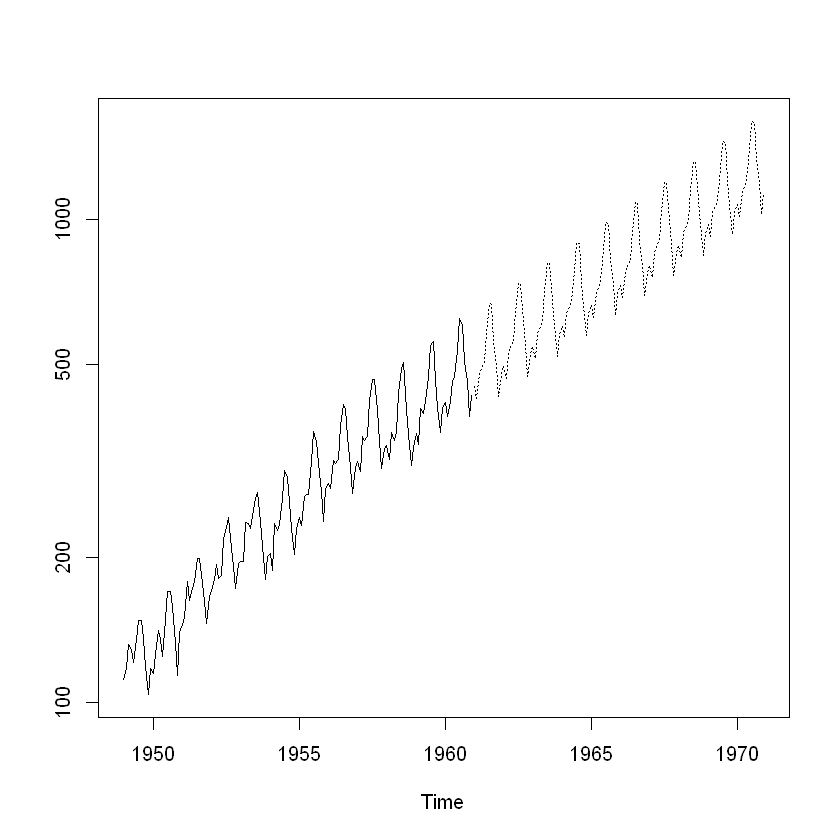

In [13]:
ts.plot(AirPassengers, 2.718^pred$pred, log = "y", lty = c(1,3))

In [1]:
time(AirPassengers)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1949 1949.000 1949.083 1949.167 1949.250 1949.333 1949.417 1949.500 1949.583
1950 1950.000 1950.083 1950.167 1950.250 1950.333 1950.417 1950.500 1950.583
1951 1951.000 1951.083 1951.167 1951.250 1951.333 1951.417 1951.500 1951.583
1952 1952.000 1952.083 1952.167 1952.250 1952.333 1952.417 1952.500 1952.583
1953 1953.000 1953.083 1953.167 1953.250 1953.333 1953.417 1953.500 1953.583
1954 1954.000 1954.083 1954.167 1954.250 1954.333 1954.417 1954.500 1954.583
1955 1955.000 1955.083 1955.167 1955.250 1955.333 1955.417 1955.500 1955.583
1956 1956.000 1956.083 1956.167 1956.250 1956.333 1956.417 1956.500 1956.583
1957 1957.000 1957.083 1957.167 1957.250 1957.333 1957.417 1957.500 1957.583
1958 1958.000 1958.083 1958.167 1958.250 1958.333 1958.417 1958.500 1958.583
1959 1959.000 1959.083 1959.167 1959.250 1959.333 1959.417 1959.500 1959.583
1960 1960.000 1960.083 1960.167 1960.250 1960.333 1960.417 1960.500 1960.583

In [7]:
cycle(AirPassengers)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12